In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Q1. Perform basic EDA**

In [11]:
df=pd.read_csv(r"C:\Users\HP\jupyter Notebook\house_price.csv")

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [16]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [20]:
df.shape

(13200, 7)

In [22]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [24]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [26]:
print(f'Duplicate rows in the datsaset :{df.duplicated().sum()}\n')

print('Bean type of duplicated rows:')
print(df[df.duplicated()].price_per_sqft.value_counts())

Duplicate rows in the datsaset :1049

Bean type of duplicated rows:
price_per_sqft
4000     25
3700     20
3999     20
3825     20
5500     20
         ..
6682      1
7480      1
7722      1
13073     1
3090      1
Name: count, Length: 483, dtype: int64


In [28]:
#Drop duplicates from dataset

df=df.drop_duplicates()

In [30]:
df.shape

(12151, 7)

In [32]:
import seaborn as sns

**Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median**                 
**Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?**

**Z Score method**


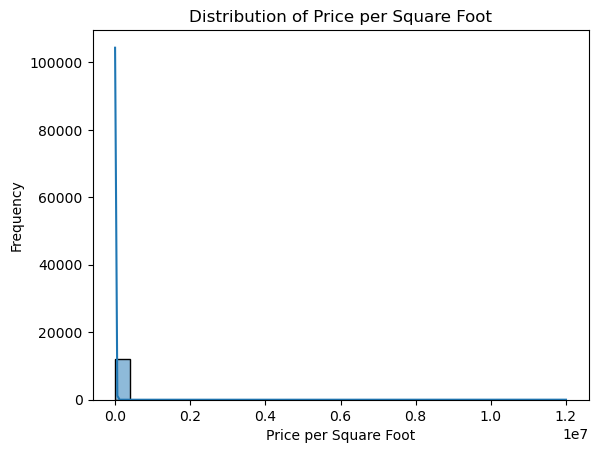

In [36]:
sns.histplot(df['price_per_sqft'], bins=30, kde=True) 
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()


**It is not normally distributed to evaluate Z Score method**

In [39]:
#find the limits
upper_limit = df["price_per_sqft"].mean() + 3*df["price_per_sqft"].std()
lower_limit = df["price_per_sqft"].mean() - 3*df["price_per_sqft"].std()
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

Upper limit: 341831.3445273039
Lower limit: -325566.06084694836


In [41]:
# Find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [43]:
#trimming - deleting the outliers
newdf= df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print("before removing the data:", len(df))
print("after removing the data:", len(newdf))
print("outliers:", len(df)-len(newdf))

before removing the data: 12151
after removing the data: 12146
outliers: 5


Create a box plot and use this to determine which method seems to work best to remove outliers for this data

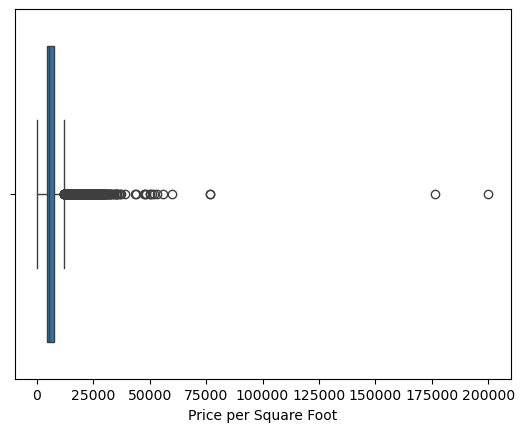

In [46]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

In [48]:
#capping - changing the outliers values to upper limit or lower limit
newdf=df.copy()
newdf.loc[(newdf['price_per_sqft'] > upper_limit),'price_per_sqft'] = upper_limit
newdf.loc[(newdf['price_per_sqft'] < lower_limit),'price_per_sqft'] = lower_limit


C:\Users\HP\AppData\Local\Temp\ipykernel_22252\2115885168.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '341831.3445273039' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  newdf.loc[(newdf['price_per_sqft'] > upper_limit),'price_per_sqft'] = upper_limit


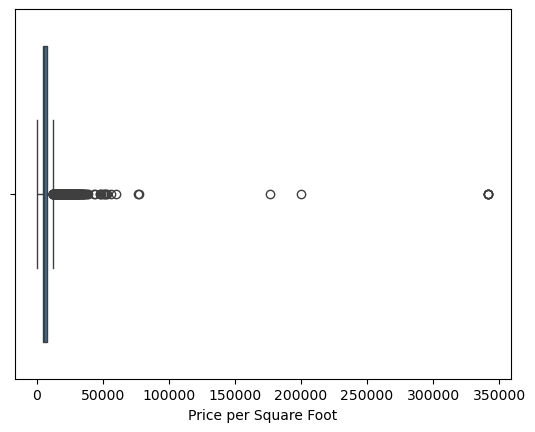

In [50]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

**IQR(Inter quartile range method)**

In [54]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr=q3-q1


In [56]:
q1, q3, iqr

(4312.0, 7461.0, 3149.0)

In [58]:
upper_limit = q3 +(1.5*iqr)
lower_limt =  q1 - (1.5*iqr)
upper_limit, lower_limit

(12184.5, -325566.06084694836)

In [60]:
# Find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [62]:
#trimming - deleting the outliers
newdf= df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print("before removing the data:", len(df))
print("after removing the data:", len(newdf))
print("outliers:", len(df)-len(newdf))

before removing the data: 12151
after removing the data: 11009
outliers: 1142


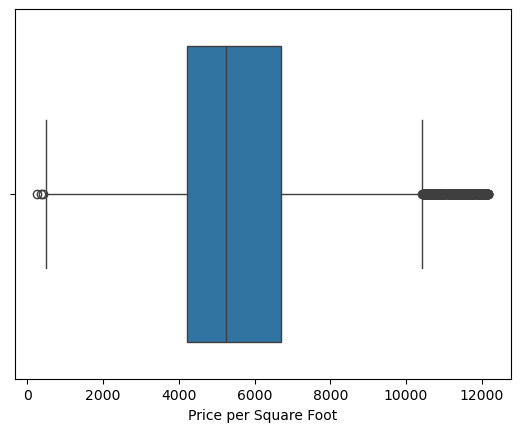

In [64]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

In [66]:
#capping - changing the outliers values to upper limit or lower limit
newdf=df.copy()
newdf.loc[(newdf['price_per_sqft'] > upper_limit),'price_per_sqft'] = upper_limit
newdf.loc[(newdf['price_per_sqft'] < lower_limit),'price_per_sqft'] = lower_limit


C:\Users\HP\AppData\Local\Temp\ipykernel_22252\2115885168.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12184.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  newdf.loc[(newdf['price_per_sqft'] > upper_limit),'price_per_sqft'] = upper_limit


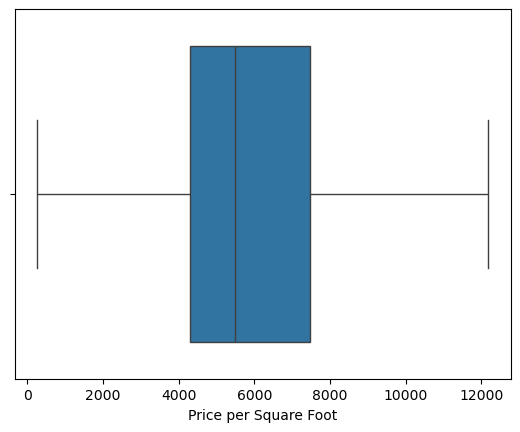

In [68]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

In [71]:
upper_limit = df['price_per_sqft'].quantile(0.95)
lower_limt = df['price_per_sqft'].quantile(0.05)

In [73]:
print(upper_limit)
print(lower_limt)

15600.0
3150.0


In [75]:
# Find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228


In [77]:
#trimming - deleting the outliers
newdf= df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print("before removing the data:", len(df))
print("after removing the data:", len(newdf))
print("outliers:", len(df)-len(newdf))

before removing the data: 12151
after removing the data: 11542
outliers: 609


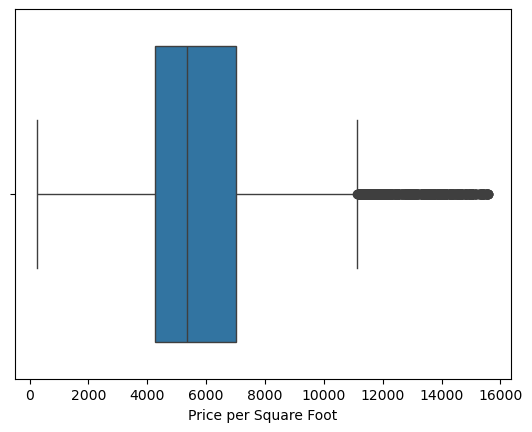

In [79]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

In [81]:
#capping - changing the outliers values to upper limit or lower limit
newdf=df.copy()
newdf.loc[(newdf['price_per_sqft'] > upper_limit),'price_per_sqft'] = upper_limit
newdf.loc[(newdf['price_per_sqft'] < lower_limit),'price_per_sqft'] = lower_limit


C:\Users\HP\AppData\Local\Temp\ipykernel_22252\2115885168.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-325566.06084694836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  newdf.loc[(newdf['price_per_sqft'] < lower_limit),'price_per_sqft'] = lower_limit


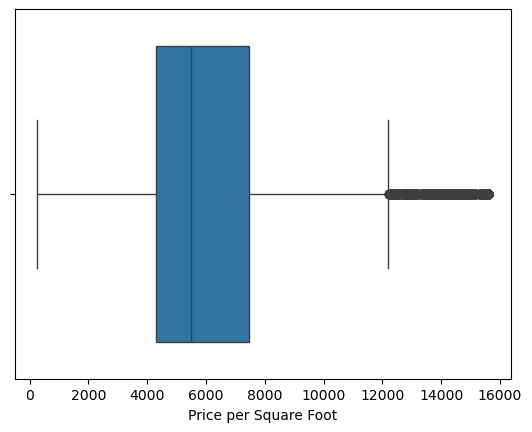

In [83]:
sns.boxplot(x=newdf['price_per_sqft'])  
plt.xlabel("Price per Square Foot")
plt.show()

**According to the boxplot of IQR, no outliers are observed in the plot. Therefore, the **IQR (Interquartile Range) method** with **capping** appears to be the best approach for handling outliers in this dataset.**

**Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.**

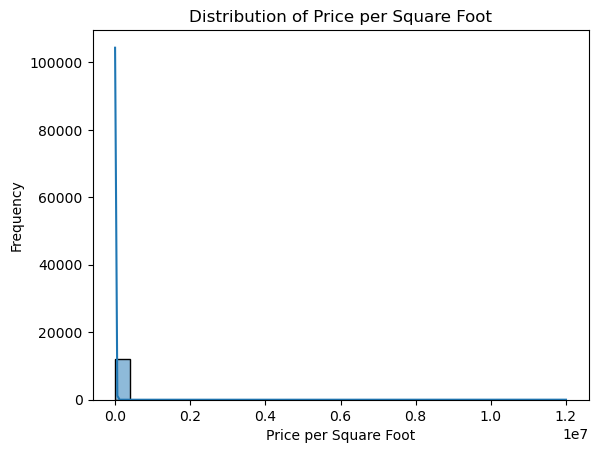

In [202]:
sns.histplot(df['price_per_sqft'], bins=30, kde=True) 
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()


In [315]:
from scipy.stats import skew,kurtosis

In [317]:
sk=df.price_per_sqft.skew()
print("Skewness before transformation:",sk)
kr= kurtosis(df.price_per_sqft)
print("kurtosis before transformation:",kr)

Skewness before transformation: 103.90203228991889
kurtosis before transformation: 11131.230839805388


**Since the skewness and kurtosis are very high, we need to transform the data.**

In [319]:
#data transformation
df["pf1"]=np.log(df.price_per_sqft)


In [321]:
df["pf1"].skew()

1.4004115521345566

In [323]:
df["pf2"]=np.log(df.pf1)

In [325]:
df["pf2"].skew()

0.8401067540531205

In [336]:
sk1=df.pf2.skew()
print("Skewness After transformation:",sk1)
kr1= kurtosis(df.pf2)
print("kurtosis After transformation:",kr1)

Skewness After transformation: 0.8401067540531205
kurtosis After transformation: 4.370075213523024


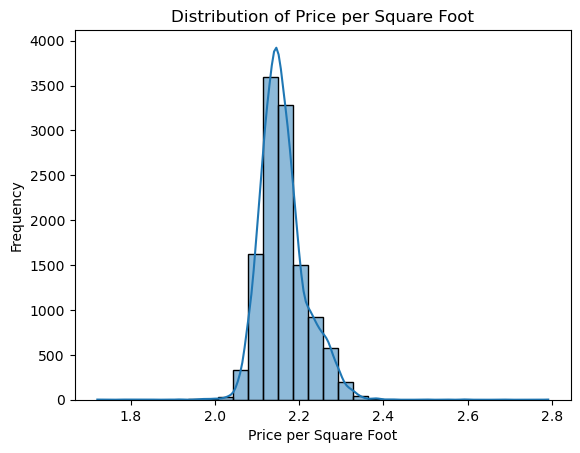

In [331]:
sns.histplot(df['pf2'], bins=30, kde=True) 
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

**Q5. Check the correlation between all the numerical columns and plot heatmap**


In [90]:
numerical_columns = df.select_dtypes(include=['number'])

print(numerical_columns)

       total_sqft  bath   price  bhk  price_per_sqft
0          1056.0   2.0   39.07    2            3699
1          2600.0   5.0  120.00    4            4615
2          1440.0   2.0   62.00    3            4305
3          1521.0   3.0   95.00    3            6245
4          1200.0   2.0   51.00    2            4250
...           ...   ...     ...  ...             ...
13194      1715.0   3.0  112.00    3            6530
13195      3453.0   4.0  231.00    5            6689
13196      3600.0   5.0  400.00    4           11111
13197      1141.0   2.0   60.00    2            5258
13198      4689.0   4.0  488.00    4           10407

[12151 rows x 5 columns]


**correlation between all the numerical columns**

In [108]:
df_numeric = df.select_dtypes(include=['number'])  
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.386694  0.572516  0.339936       -0.008877
bath              0.386694  1.000000  0.448802  0.898875        0.030133
price             0.572516  0.448802  1.000000  0.390008        0.027415
bhk               0.339936  0.898875  0.390008  1.000000        0.030294
price_per_sqft   -0.008877  0.030133  0.027415  0.030294        1.000000


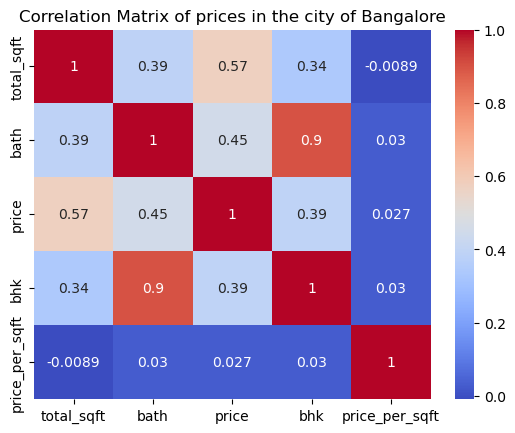

In [110]:
# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of prices in the city of Bangalore")
plt.show()


**Q6. Draw Scatter plot between the variables to check the correlation between them.**

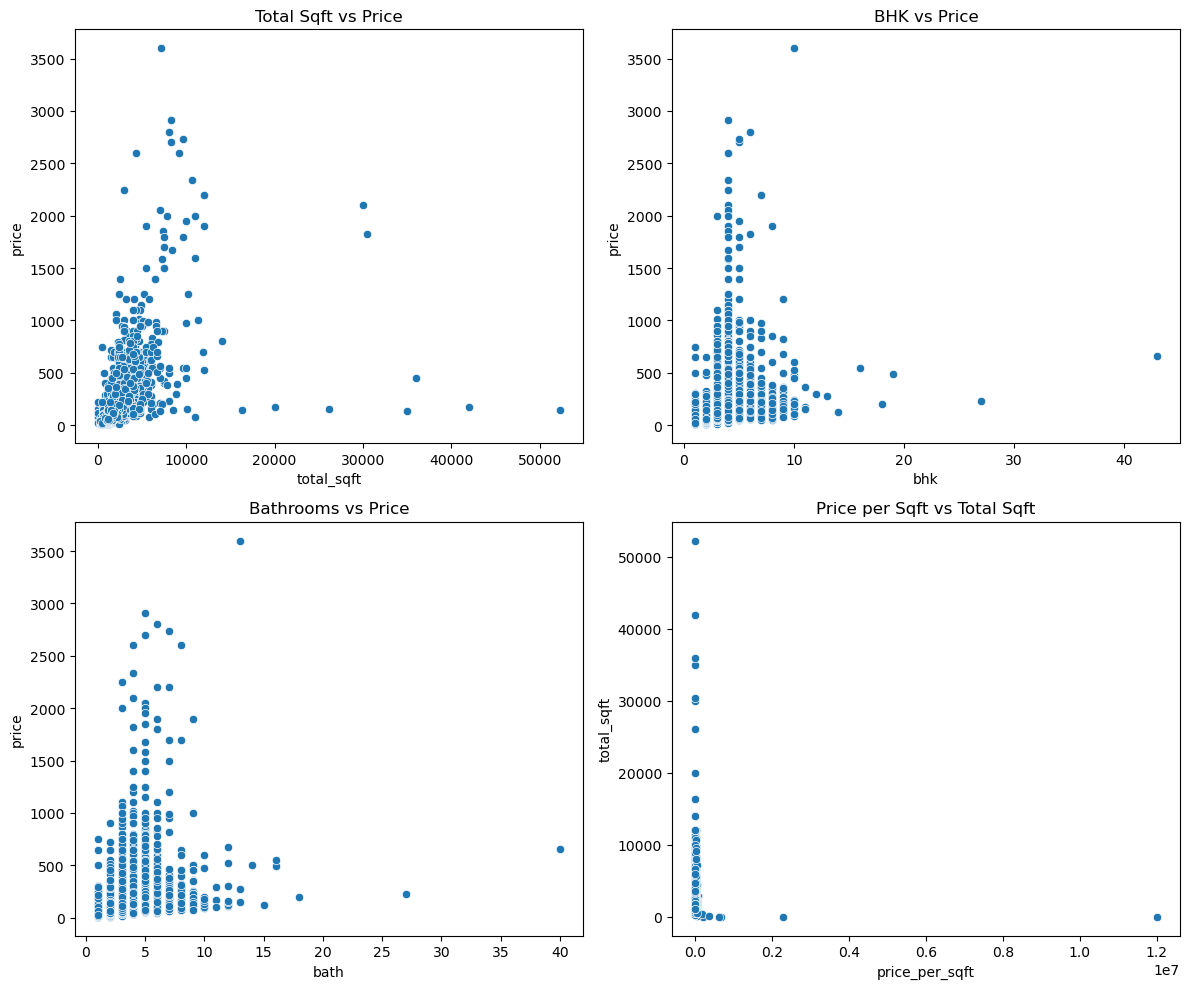

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df['total_sqft'], y=df['price'], ax=axes[0, 0])
axes[0, 0].set_title("Total Sqft vs Price")

sns.scatterplot(x=df['bhk'], y=df['price'], ax=axes[0, 1])
axes[0, 1].set_title("BHK vs Price")

sns.scatterplot(x=df['bath'], y=df['price'], ax=axes[1, 0])
axes[1, 0].set_title("Bathrooms vs Price")

sns.scatterplot(x=df['price_per_sqft'], y=df['total_sqft'], ax=axes[1, 1])
axes[1, 1].set_title("Price per Sqft vs Total Sqft")

plt.tight_layout()
plt.show()
